CAPTCHA PREDICTION USING CONVOLUTION NEURAL NETWORK

Capthca sample Image : 
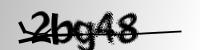

Add folloing captcha files to your Drive : https://drive.google.com/drive/folders/1stLiPoijw4yhwBbUCdUizZMiriBU9Jxu?usp=sharing

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import os
import time
import json
import glob
import string
import cv2

import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Model

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

tf.__version__

'2.11.0'

In [2]:
from google.colab import drive
# Mounting drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Change this Variable value accordingly
DATA_DIR = '/content/drive/MyDrive/samples/samples/'

In [4]:
#total no of images in dataset
n = len(os.listdir(DATA_DIR))
n

1070

In [5]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels

In [8]:
# All symbols that captcha can contain
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
print("Possible character : " + character)

Possible character : abcdefghijklmnopqrstuvwxyz0123456789


In [9]:
# Total number of char possible
nchar = len(character) 
print("Total number of possible character : " + str(nchar))

Total number of possible character : 36


In [11]:
#preprocesss image
def preprocess():
    X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
    y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

    for i, pic in enumerate(os.listdir(DATA_DIR)):
    #i represents index no. of image in directory 
    #pic contains the file name of the particular image to be preprocessed at a time
    
        img = cv2.imread(os.path.join(DATA_DIR, pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
        pic_target = pic[:-4]#this drops the .png extension from file name and contains only the captcha for training
        
        if len(pic_target) < 6: #captcha is not more than 5 letters
            img = img / 255.0 #scales the image between 0 and 1
            img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

            target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

        for j, k in enumerate(pic_target):
        #j iterates from 0 to 4(5 letters in captcha)
        #k denotes the letter in captcha which is to be scanned
            index = character.find(k) #index stores the position of letter k of captcha in the character string
            target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

        X[i] = img #stores all the images
        y[:,i] = target #stores all the info about the letters in captcha of all images

    return X,y

In [14]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    
    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers
    
    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [15]:
#Create model
model=createmodel();
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d[0][0]']      

In [16]:
X,y=preprocess()

In [17]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [18]:
#Applying the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=120, validation_split=0.8)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/120
7/7 [==============================] - 11s 828ms/step - loss: 19.3000 - dense_1_loss: 3.6096 - dense_3_loss: 3.9075 - dense_5_loss: 4.0699 - dense_7_loss: 3.9082 - dense_9_loss: 3.8048 - dense_1_accuracy: 0.1088 - dense_3_accuracy: 0.0466 - dense_5_accuracy: 0.0518 - dense_7_accuracy: 0.0207 - dense_9_accuracy: 0.0674 - val_loss: 17.7524 - val_dense_1_loss: 3.5362 - val_dense_3_loss: 3.5502 - val_dense_5_loss: 3.5283 - val_dense_7_loss: 3.5719 - val_dense_9_loss: 3.5658 - val_dense_1_accuracy: 0.0476 - val_dense_3_accuracy: 0.0463 - val_dense_5_accuracy: 0.0553 - val_dense_7_accuracy: 0.0373 - val_dense_9_accuracy: 0.0695
Epoch 2/120
7/7 [==============================] - 9s 1s/step - loss: 17.3601 - dense_1_loss: 3.1682 - dense_3_loss: 3.4316 - dense_5_loss: 3.6689 - dense_7_loss: 3.5568 - dense_9_loss: 3.5347 - dense_1_accuracy: 0.1192 - dense_3_accuracy: 0.0674 - dense_5_accuracy: 0.0570 - dense_7_accuracy: 0.0415 - dense_9_accuracy: 0.0881 - val_loss: 17.7090 - val_dens

In [21]:
model.save("model_m1.h5")

In [19]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

1/1 [==============================] - 0s 302ms/step
Predicted Captcha = 2n56g


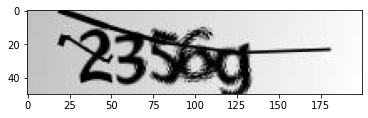

In [20]:
# Predict Captcha
CAPTCHA_PATH = '/content/drive/MyDrive/samples/2356g.png'
img=cv2.imread(CAPTCHA_PATH,cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))
print("Predicted Captcha =",predict(CAPTCHA_PATH))